# Aggregating Velocity and Acceleration Data
Aggregating Velocity and Acceleration Data from a Collection of Drive

In [1]:
import strym
from strym import strymread
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd

/home/ivory/anaconda3/envs/dbn/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Loading BokehJS ...

## We are only going to collect Toyota RAV4 drives hence, ignore all Honda Pilot drives

In [2]:
parentfolder = "../../PandaData/"
dbcfile = '../examples/newToyotacode.dbc'
csvlist = []
folderlist = glob.glob(parentfolder+"*")
speedlist = []
for datafolder in folderlist:
    csvlisttmp = glob.glob(datafolder+"/*.csv")
    for f in csvlisttmp:
        if "CAN" not in f:
            continue
        if "5FNYF6H05HB089022" in f:
            continue
        csvlist.append(f)

In [3]:
speed_list = []
accelx_list = []
for csv in csvlist:
    print("\nReading the CSV file {}".format(csv))m.
    r = strymread(csvfile=csv, dbcfile=dbcfile)
        
    if r.success is True:
        if r.burst is True:
            print("Burst Data. Skipping ....")
            continue
    
        speed = r.speed()
        if speed.shape[0] == 0:
            continue
        accelx = r.accelx()
        if accelx.shape[0] == 0:
            continue
        
        speed_list.append(speed)
        accelx_list.append(accelx)


Reading the CSV file /home/ivory/CyverseData/JmscslgroupData/PandaData/2020_02_13/2020-02-13-08-29-09-380270__CAN_Message.csv

Reading the CSV file /home/ivory/CyverseData/JmscslgroupData/PandaData/2020_02_13/2020-02-13-15-37-19-262923__CAN_Message.csv

Reading the CSV file /home/ivory/CyverseData/JmscslgroupData/PandaData/2020_03_15/2020-03-15-17-32-00_CAN_Messages.csv

Reading the CSV file /home/ivory/CyverseData/JmscslgroupData/PandaData/2020_03_15/2020-03-15-15-12-00_CAN_Messages.csv

Reading the CSV file /home/ivory/CyverseData/JmscslgroupData/PandaData/2019_11_08/2019-11-08-09-58-45-252022__CAN_Message_Toyotaa_CHR.csv
Burst Data. Skipping ....

Reading the CSV file /home/ivory/CyverseData/JmscslgroupData/PandaData/2019_11_08/2019-11-08-10-01-55-076615__CAN_Message_Toyotaa_CHR.csv
Burst Data. Skipping ....

Reading the CSV file /home/ivory/CyverseData/JmscslgroupData/PandaData/2019_11_08/2019-11-08-10-00-18-782963__CAN_Message_Toyotaa_CHR.csv

Reading the CSV file /home/ivory/Cyv

Reading the CSV file /home/ivory/CyverseData/JmscslgroupData/PandaData/2020_02_27/2020-02-27-16-16-04-935080__CAN_Messages.csv

Reading the CSV file /home/ivory/CyverseData/JmscslgroupData/PandaData/2020_02_27/2020-02-27-15-38-26-238467__CAN_Messages.csv

Reading the CSV file /home/ivory/CyverseData/JmscslgroupData/PandaData/2020_01_31/2020-01-31-13-32-59-900537__CAN_Message_.csv

Reading the CSV file /home/ivory/CyverseData/JmscslgroupData/PandaData/2020_01_31/2020-01-31-11-52-22-509405__CAN_Message_.csv
Burst Data. Skipping ....

Reading the CSV file /home/ivory/CyverseData/JmscslgroupData/PandaData/2020_01_31/2020-01-31-13-38-24-204512__CAN_Message_.csv

Reading the CSV file /home/ivory/CyverseData/JmscslgroupData/PandaData/2020_01_31/2020-01-31-11-58-46-177685__CAN_Message_.csv
Burst Data. Skipping ....

Reading the CSV file /home/ivory/CyverseData/JmscslgroupData/PandaData/2020_01_31/2020-01-31-13-54-28-723426__CAN_Message_Rav4.csv

Reading the CSV file /home/ivory/CyverseData/Jms

Reading the CSV file /home/ivory/CyverseData/JmscslgroupData/PandaData/2020_01_30  - Sprinkles drive/2020-01-27-16-13-13-149841__CAN_Message_Rav4.csv
Burst Data. Skipping ....

Reading the CSV file /home/ivory/CyverseData/JmscslgroupData/PandaData/2020_01_30  - Sprinkles drive/2020-01-30-09-06-58-721293__CAN_Message_Rav4.csv
Burst Data. Skipping ....

Reading the CSV file /home/ivory/CyverseData/JmscslgroupData/PandaData/2020_01_30  - Sprinkles drive/2020-01-30-16-26-38-726177__CAN_Message_Rav4.csv
No data was present in the csvfile or pandas dataframe supplied is empty. Unable to perform further operation

Reading the CSV file /home/ivory/CyverseData/JmscslgroupData/PandaData/2020_01_30  - Sprinkles drive/2020-01-30-09-42-19-693772__CAN_Message_Rav4.csv
Burst Data. Skipping ....

Reading the CSV file /home/ivory/CyverseData/JmscslgroupData/PandaData/2020_01_30  - Sprinkles drive/2020-01-27-18-24-06-685660__CAN_Message_Rav4.csv
Burst Data. Skipping ....

Reading the CSV file /home/ivor

## Save the variable

In [12]:
import pickle
datapath = '../../speed/'
speedfile = 'all_speed.pickle'
accelxfile = 'all_accelx.pickle'

with open(datapath+speedfile, 'wb') as f:
    pickle.dump([speed_list], f)
    
with open(datapath+accelxfile, 'wb') as f:
    pickle.dump([accelx_list], f)

## Load the dataset

In [91]:
import pickle

datapath = '../../speed/'
speedfile = 'all_speed.pickle'
accelxfile = 'all_accelx.pickle'

speed_list = None
accelx_list = None
with open(datapath+speedfile, 'rb') as f:
    ss = pickle.load(f)
    speed_list = ss[0]
with open(datapath+accelxfile, 'rb') as f:
    ss = pickle.load(f)
    accelx_list = ss[0]

In [92]:
indices_t = []
new_speed_list = []
for i, s in enumerate(speed_list):
    if s.shape[0] > 10:
        new_speed_list.append(s)

In [93]:
new_speed_list[34]

,Time,Message
Clock,,
2020-03-26 17:03:11.229470015,1.585242e+09,60.58
2020-03-26 17:03:11.230471134,1.585242e+09,60.58
2020-03-26 17:03:11.232092857,1.585242e+09,60.64
2020-03-26 17:03:11.234658957,1.585242e+09,60.64
2020-03-26 17:03:11.235782146,1.585242e+09,60.58
...,...,...
2020-03-26 17:38:03.747910976,1.585244e+09,0.00
2020-03-26 17:38:03.768285990,1.585244e+09,0.00
2020-03-26 17:38:03.787950039,1.585244e+09,0.00


In [94]:
diffspeed = []
for s in new_speed_list:
    s['Message'] = s['Message']*0.277778 # Convert KM/H to M/S
    accel = strymread.differentiate(s)
    diffspeed.append(accel)

In [95]:
new_speed_list[34]

,Time,Message
Clock,,
2020-03-26 17:03:11.229470015,1.585242e+09,16.827791
2020-03-26 17:03:11.230471134,1.585242e+09,16.827791
2020-03-26 17:03:11.232092857,1.585242e+09,16.844458
2020-03-26 17:03:11.234658957,1.585242e+09,16.844458
2020-03-26 17:03:11.235782146,1.585242e+09,16.827791
...,...,...
2020-03-26 17:38:03.747910976,1.585244e+09,0.000000
2020-03-26 17:38:03.768285990,1.585244e+09,0.000000
2020-03-26 17:38:03.787950039,1.585244e+09,0.000000


In [96]:
speed = pd.concat(new_speed_list)

In [97]:
accel = pd.concat(diffspeed)

In [98]:
speed.shape

(5546112, 2)

In [99]:
speed.sort_index(inplace=True)

# find the time values that are same and drop the latter entry. It is essential for spline
# interpolation to work 
collect_indices = []
for i in range(0, len(speed['Time'].values)-1):
    if speed['Time'].values[i] == speed['Time'].values[i+1]:
        collect_indices.append(speed.index.values[i+1])
speed = speed.drop(collect_indices)

In [100]:
speed.shape

(4991528, 2)

In [101]:
accel.shape

(4993940, 2)

In [102]:
accel.sort_index(inplace=True)

# find the time values that are same and drop the latter entry. It is essential for spline
# interpolation to work 
collect_indices = []
for i in range(0, len(accel['Time'].values)-1):
    if accel['Time'].values[i] == accel['Time'].values[i+1]:
        collect_indices.append(accel.index.values[i+1])
accel = accel.drop(collect_indices)

In [103]:
accel.shape

(4991528, 2)

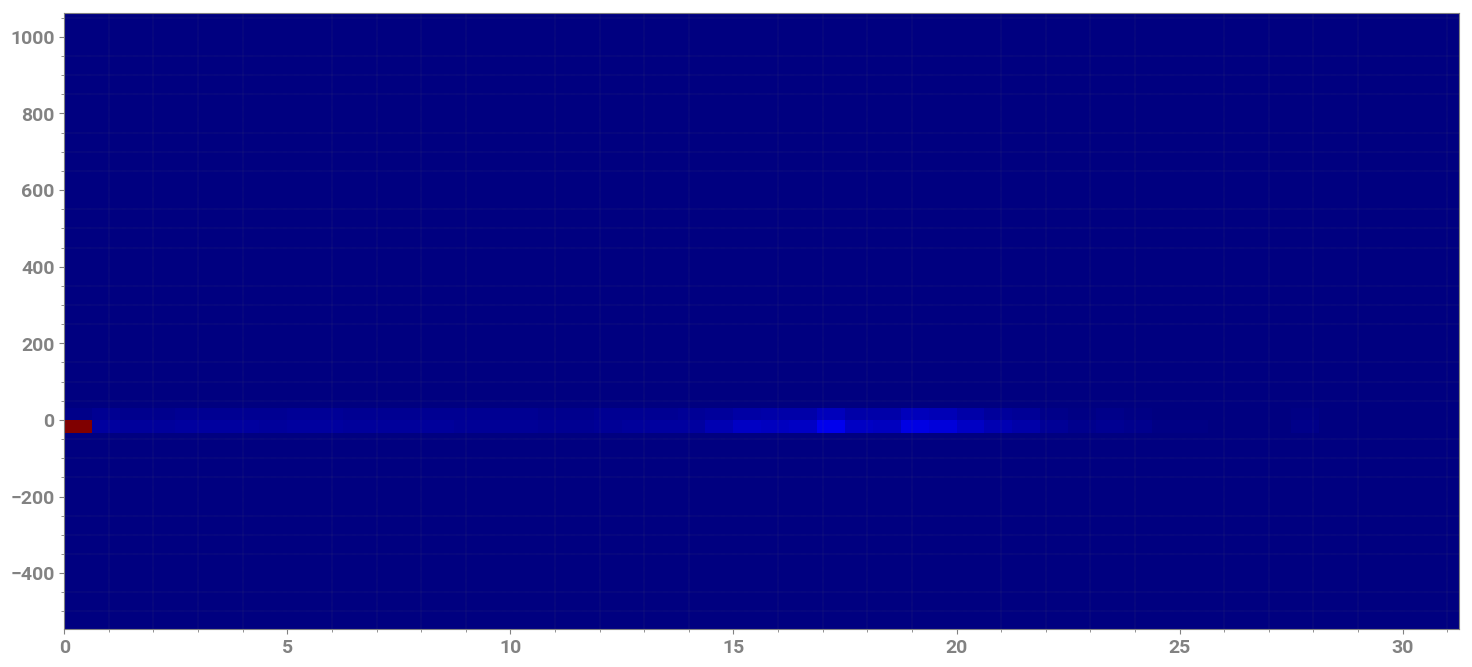

In [104]:
fig, ax = strymread.create_fig(1)
ax[0].hist2d(speed['Message'], accel['Message'], bins=(50, 50), cmap=plt.cm.jet)
plt.show()

In [105]:
newdf = pd.DataFrame()
newdf['Time'] = speed['Time']
newdf['Speed'] = speed['Message']
newdf['Accel'] = accel['Message']

In [106]:
newdf = newdf[(newdf['Accel'] > -10) & (newdf['Accel'] < 10)]

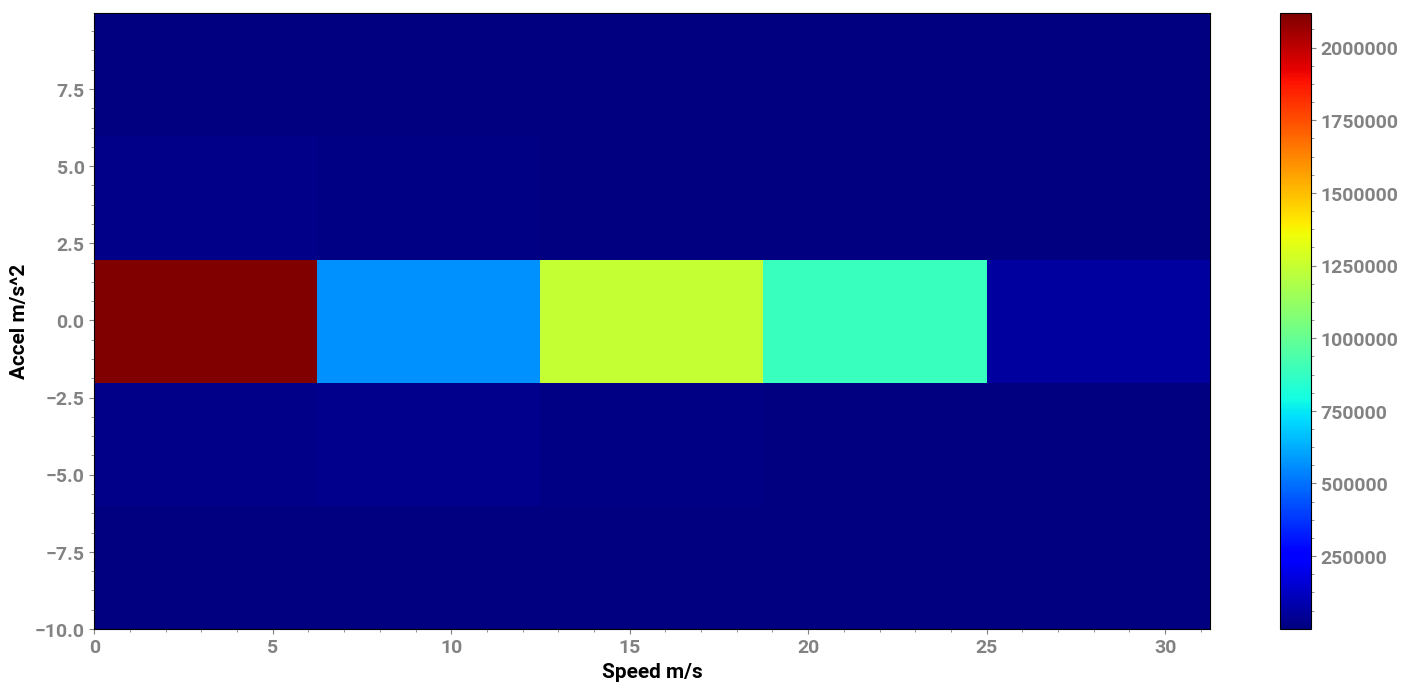

In [107]:
plt.hist2d(newdf['Speed'], newdf['Accel'], bins=(5, 5), cmap=plt.cm.jet)
plt.xlabel('Speed m/s')
plt.ylabel('Accel m/s^2')
plt.colorbar()
plt.show()

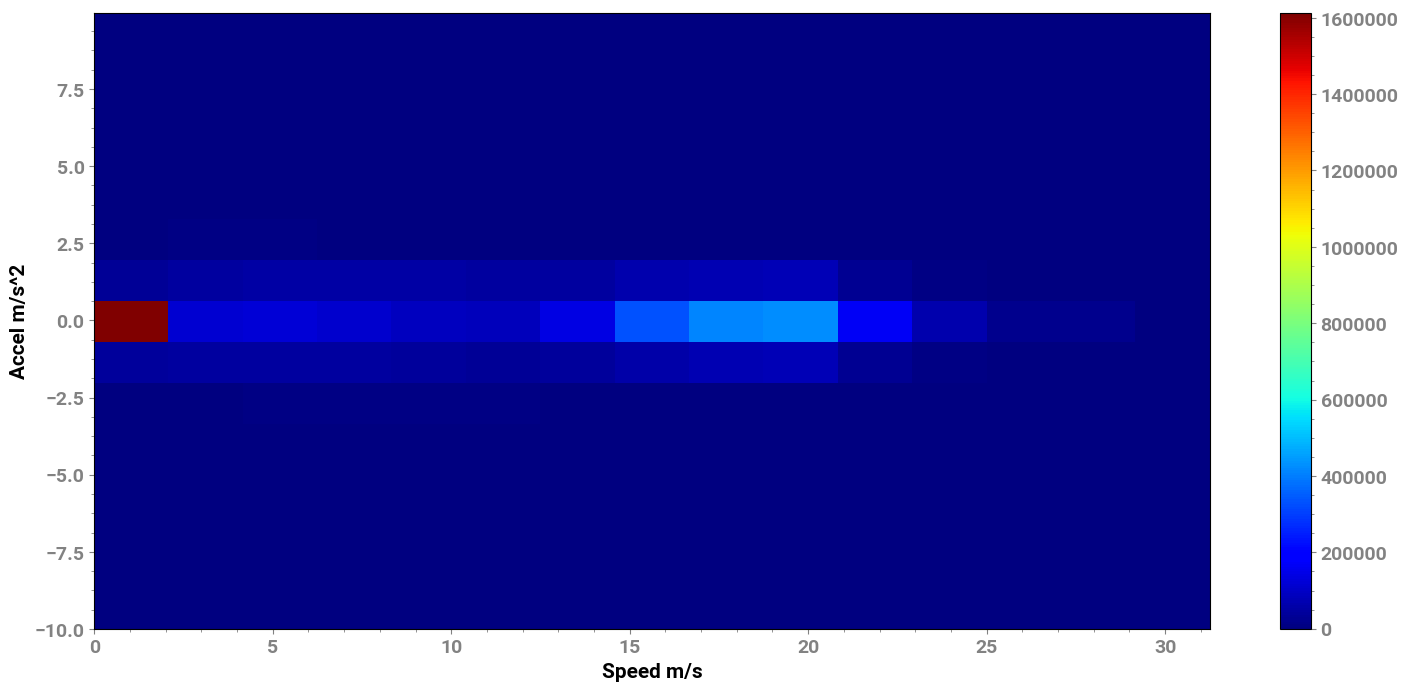

In [109]:
plt.hist2d(newdf['Speed'], newdf['Accel'], bins=(15, 15), cmap=plt.cm.jet)
plt.xlabel('Speed m/s')
plt.ylabel('Accel m/s^2')
plt.colorbar()
plt.show()

In [110]:
speed.shape

(4991528, 2)

In [114]:
variable_dict = {"speed": speed.to_numpy()}
import scipy.io as sio
matfile = '../../speed/all_speed.mat'
sio.savemat(matfile, variable_dict)

In [162]:
R = np.zeros(0)
for v in speed_list:
    w  = v.Time[-1] - v.Time[0]
    R = np.append(R, w)

Text(0, 0.5, 'Time (seconds)')

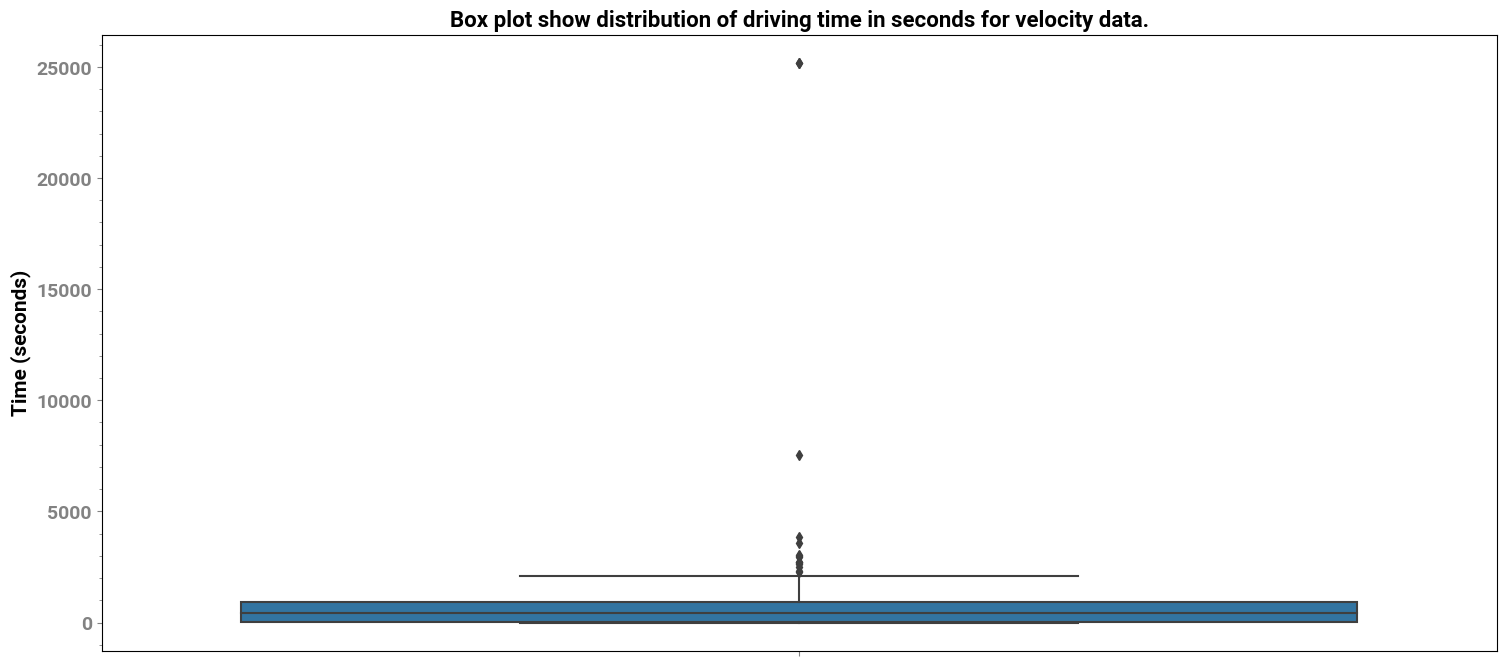

In [158]:
import seaborn as sea
sea.boxplot(R, orient="v")
plt.title('Box plot show distribution of driving time in seconds for velocity data.')
plt.ylabel('Time (seconds)')

In [161]:
np.sum(R)

177669.2773733139

In [168]:
R = np.zeros(0)
variable_dict_separate = {}
for i, v in enumerate(speed_list):
    variable_dict_separate['speed_'+str(i)] = v.to_numpy()
    

In [169]:
matfile = '../../speed/all_speed_separate.mat'
sio.savemat(matfile, variable_dict_separate)